In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

### Loading and importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### We are reading train data(2020 12 months data). #Data was taken as csv from the Ibb website.

In [2]:
#https://data.ibb.gov.tr/dataset/hourly-traffic-density-data-set/resource/8f492f69-95d0-46d7-b265-c141f8dba1a2?inner_span=True

In [3]:
data = pd.read_csv(r'C:\Users\berrin.gocer\Desktop\IBB\df_new.csv')

In [4]:
data.head()

,_id,DATE_TIME,LATITUDE,LONGITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,1890.0,2020-01-01T00:00:00,29.207153,40.976257,sxkc0e,113,19,77,40
1,3147.0,2020-01-01T01:00:00,29.207153,40.976257,sxkc0e,119,13,72,43
2,6099.0,2020-01-01T02:00:00,29.207153,40.976257,sxkc0e,131,19,70,33
3,8686.0,2020-01-01T03:00:00,29.207153,40.976257,sxkc0e,123,34,81,16
4,9476.0,2020-01-01T04:00:00,29.207153,40.976257,sxkc0e,114,28,65,13


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8642 entries, 0 to 8641
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 2143 non-null   float64
 1   DATE_TIME           8642 non-null   object 
 2   LATITUDE            8642 non-null   float64
 3   LONGITUDE           8642 non-null   float64
 4   GEOHASH             8642 non-null   object 
 5   MINIMUM_SPEED       8642 non-null   int64  
 6   MAXIMUM_SPEED       8642 non-null   int64  
 7   AVERAGE_SPEED       8642 non-null   int64  
 8   NUMBER_OF_VEHICLES  8642 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 607.8+ KB


In [6]:
# finding location from coordinates
from geopy.geocoders import Nominatim

# Converting coordinates to addresses
geolocator = Nominatim(user_agent="adres_bulma")
location = geolocator.reverse("40.976257, 29.207153", language='tr')

# Checking the address
print(location.address)

Samandıra, D100 - E80 Bağlantı Yolu, Eyüp Sultan Mahallesi, Sancaktepe, İstanbul, Marmara Bölgesi, 34885, Türkiye


### Coordinate Address Used: Samandıra, Samandıra Caddesi, Eyüp Sultan District, Sancaktepe, Istanbul, Marmara Region, 34885, Turkey

In [7]:
# deletion of columns that will not be used in the model
data = data.drop(['_id', 'GEOHASH','LATITUDE','LONGITUDE'], axis=1)

In [8]:
data.head()

,DATE_TIME,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-01T00:00:00,113,19,77,40
1,2020-01-01T01:00:00,119,13,72,43
2,2020-01-01T02:00:00,131,19,70,33
3,2020-01-01T03:00:00,123,34,81,16
4,2020-01-01T04:00:00,114,28,65,13


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8642 entries, 0 to 8641
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DATE_TIME           8642 non-null   object
 1   MINIMUM_SPEED       8642 non-null   int64 
 2   MAXIMUM_SPEED       8642 non-null   int64 
 3   AVERAGE_SPEED       8642 non-null   int64 
 4   NUMBER_OF_VEHICLES  8642 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 337.7+ KB


In [10]:
## Compression is performed to make time data more meaningful

In [11]:
# We convert the column we received as DATE_TIME object to date format
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

# Data compression takes place here
data['DATE_TIME'] = data['DATE_TIME'].dt.floor('4H')
data = data.groupby('DATE_TIME').agg({'AVERAGE_SPEED': 'mean', 'MINIMUM_SPEED': 'mean', 'MAXIMUM_SPEED': 'mean', 'NUMBER_OF_VEHICLES': 'mean'}).reset_index()


# Convert column 'DATE_TIME' to timestamp
data['TIMESTAMP'] = data['DATE_TIME'].values.astype(np.int64) // 10**9

In [12]:
data.head()

,DATE_TIME,AVERAGE_SPEED,MINIMUM_SPEED,MAXIMUM_SPEED,NUMBER_OF_VEHICLES,TIMESTAMP
0,2020-01-01 00:00:00,75.00,121.50,21.25,33.00,1577836800
1,2020-01-01 04:00:00,64.25,113.00,19.75,19.50,1577851200
2,2020-01-01 08:00:00,57.00,113.00,8.50,45.25,1577865600
3,2020-01-01 12:00:00,60.50,124.75,6.50,89.25,1577880000
4,2020-01-01 16:00:00,60.00,118.00,7.50,85.00,1577894400


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE_TIME           2170 non-null   datetime64[ns]
 1   AVERAGE_SPEED       2170 non-null   float64       
 2   MINIMUM_SPEED       2170 non-null   float64       
 3   MAXIMUM_SPEED       2170 non-null   float64       
 4   NUMBER_OF_VEHICLES  2170 non-null   float64       
 5   TIMESTAMP           2170 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 101.8 KB


# Model Stage

In [14]:
data.columns

Index(['DATE_TIME', 'AVERAGE_SPEED', 'MINIMUM_SPEED', 'MAXIMUM_SPEED',
       'NUMBER_OF_VEHICLES', 'TIMESTAMP'],
      dtype='object')

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separate input and target variables
X = data[['TIMESTAMP', 'MINIMUM_SPEED', 'MAXIMUM_SPEED', 'NUMBER_OF_VEHICLES']]
y = data['AVERAGE_SPEED']

# Let's divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

LinearRegression()

# Model Outputs: Predicted & Target

In [16]:
# Make predictions on test dataset
y_pred = model.predict(X_test)

# Compare estimated and actual values
comparison = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
print(comparison)

      Gerçek Değerler  Tahmin Edilen Değerler
1202            60.25               61.715857
342             48.75               53.424209
1341            58.75               60.333772
765             55.25               61.231188
1085            50.50               49.798727
...               ...                     ...
543             56.50               60.415532
987             57.25               55.426412
909             56.25               61.626924
256             48.50               48.462020
1471            55.75               58.818496

[434 rows x 2 columns]


# Graphical display of estimated and actual values# Tahmin edilen ve gerçek değerlerin grafik olarak gösterimi

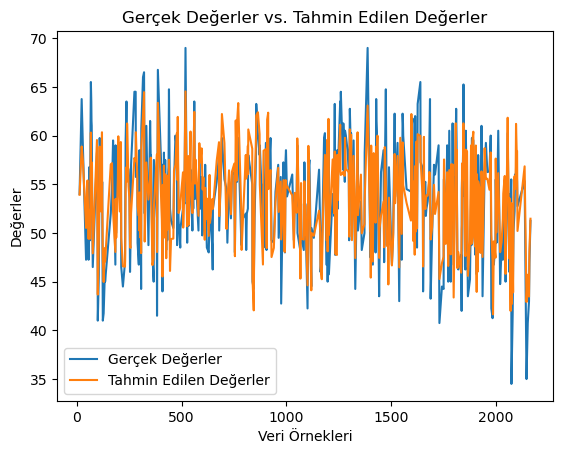

In [17]:
import matplotlib.pyplot as plt

# Compare estimated and actual values
comparison = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Sorted indexes
comparison = comparison.sort_index()

# Create image
plt.plot(comparison.index, comparison['Gerçek Değerler'], label='Gerçek Değerler')
plt.plot(comparison.index, comparison['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler')

plt.xlabel('Veri Örnekleri')
plt.ylabel('Değerler')
plt.title('Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.legend()
plt.show()

## Model Performance on Train and Test data # R-Square #MSE #MAE Calculations
### R-Square ranges from 0 to 1 and represents an increase in model performance as it approaches 1.
### MSE - Mean Squared Error (error rate) The closer to 0, the better the model yield
### MAE - Mean Absolute Error The closer to 0, the better the model yield

In [18]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics to the screen
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

# Select the best model (As there is only one model here, the best will be the same model)
best_model = model
best_model_mse = mse

MSE: 11.102595788868364
MAE: 2.6825669459564767
R^2: 0.6782865451142128


# Querying the predict value for the desired date to the model

##### First, the desired date is entered manually in the date_string section.
##### Since this data model is trained with timestamp data, it is converted to timestamp format and predict value is obtained.

In [19]:
# Specify the date and time value
date_string = '2020-01-01 12:00:00'

# Convert date and time value to datetime format
date_time = pd.to_datetime(date_string)

# Converting date and time value to timestamp format and printing
timestamp = date_time.timestamp()
print(timestamp)

1577880000.0


In [20]:
# Temporarily disable alerts
import warnings
warnings.filterwarnings("ignore")


# Make predictions using inputs
input_data = [[timestamp, 25, 60, 100]]
prediction = best_model.predict(input_data)
print(f"Tahmin: {prediction}")

Tahmin: [44.69525443]
